<a href="https://colab.research.google.com/github/angelareis/Projeto_Mocoia/blob/main/Aula09_of_DESAFIO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/auto_industry.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
data.loc[ data['horsepower'].isnull(), 'horsepower' ] = []

In [ ]:
data.loc[ data['horsepower']==99]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,99.0,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,99.0,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,99.0,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,99.0,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,99.0,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,99.0,3035,20.5,82,usa,amc concord dl


In [ ]:
data.dropna(inplace=True)

## Calcule quantos modelos foram lançados em anos pares

In [ ]:
data.loc[ data['model_year'] % 2 == 0, 'name'].nunique() 

180

## Crie uma coluna para a marca do veículo e outra para o nome



In [ ]:
data['brand'] = [i[0] for i in data['name'].str.split(' ')]
data['model'] = [' '.join(i[1:]) for i in data['name'].str.split(' ')] 

In [ ]:
marca_nome = data['name'].str.split(' ', n=1, expand=True)

In [ ]:
data['marca'] = marca_nome.iloc[:,0]
data['nome'] = marca_nome.iloc[:,1]

In [ ]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca,nome
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320


## É posível identificar alguma relação entre mpg e acceleration?

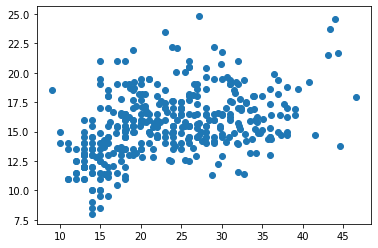

In [ ]:
plt.scatter( data['mpg'], data['acceleration'] )

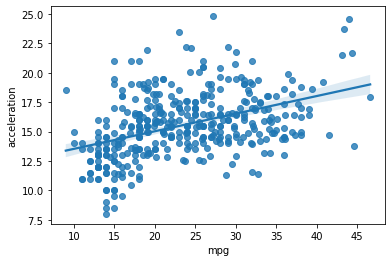

In [ ]:
sns.regplot( data=data, y='acceleration', x = 'mpg' )

In [ ]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [ ]:
data.corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306
model_year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000


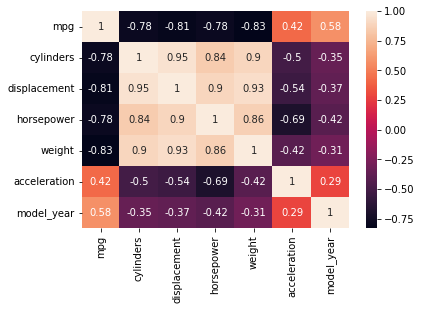

In [ ]:
sns.heatmap(data.corr(), annot=True)

## Explore as variáveis da tabela agrupando pelo país de origem. Existe diferenças entre elas?

In [ ]:
data.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118,75.676471
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204,75.591837


## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de origem para que todos comecem com letras maiúsculas.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['Km/L'] = data['mpg']/2.352

In [ ]:
data['origin'] = data['origin'].str.title()

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca,nome,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino,7.227891


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Descreva os resultados.

In [ ]:
pd.pivot_table(data, values='mpg', index='model_year', columns='cylinders' )

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,25.285714,NaN,20.500000,14.111111
71,NaN,27.666667,NaN,18.000000,13.428571
72,19.0,23.428571,NaN,NaN,13.615385
73,18.0,22.727273,NaN,19.000000,13.200000
74,NaN,27.800000,NaN,17.333333,14.200000
75,NaN,25.250000,NaN,17.583333,15.666667
76,NaN,26.766667,NaN,20.000000,14.666667
77,21.5,29.107143,NaN,19.500000,16.000000
78,NaN,29.576471,20.3,19.066667,19.050000


## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [ ]:
data.groupby( ['origin', 'cylinders'] ).mean()[['horsepower']]

horsepower
origin cylinders            
Europe 4           78.311475
       5           82.333333
       6          113.500000
Japan  3           99.250000
       4           75.579710
       6          115.833333
Usa    4           80.956522
       6           99.671233
       8          158.300971

In [ ]:
pd.pivot_table(data, values='horsepower', index='origin', columns='cylinders' )

cylinders,3,4,5,6,8
origin,,,,,
Europe,NaN,78.311475,82.333333,113.500000,NaN
Japan,99.25,75.579710,NaN,115.833333,NaN
Usa,NaN,80.956522,NaN,99.671233,158.300971


## Verifique como consumo, horsepower e cylinders se altera ao longo dos anos para cada país da coluna origin.

In [ ]:
data['origin'].value_counts()

Usa       245
Japan      79
Europe     68
Name: origin, dtype: int64

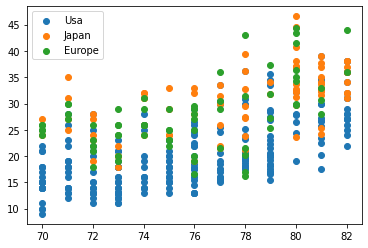

In [ ]:
plt.scatter( data.loc[ data['origin'] == 'Usa', 'model_year'], data.loc[ data['origin'] == 'Usa', 'mpg'], label='Usa' )
plt.scatter( data.loc[ data['origin'] == 'Japan', 'model_year'], data.loc[ data['origin'] == 'Japan', 'mpg'], label='Japan' )
plt.scatter( data.loc[ data['origin'] == 'Europe', 'model_year'], data.loc[ data['origin'] == 'Europe', 'mpg'], label='Europe' )
plt.legend()

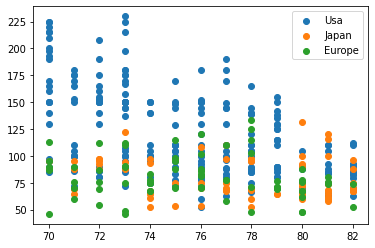

In [ ]:
plt.scatter( data.loc[ data['origin'] == 'Usa', 'model_year'], data.loc[ data['origin'] == 'Usa', 'horsepower'], label='Usa' )
plt.scatter( data.loc[ data['origin'] == 'Japan', 'model_year'], data.loc[ data['origin'] == 'Japan', 'horsepower'], label='Japan' )
plt.scatter( data.loc[ data['origin'] == 'Europe', 'model_year'], data.loc[ data['origin'] == 'Europe', 'horsepower'], label='Europe' )
plt.legend()

## Crie uma nova coluna com o continente dos países baseado na coluna `origin`

In [ ]:
data.loc[ data['origin'] == 'Usa', 'Continente' ] = 'América do Norte'
data.loc[ data['origin'] == 'Japan', 'Continente' ] = 'Ásia'
data.loc[ data['origin'] == 'Europe', 'Continente' ] = 'Europa'

In [ ]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca,nome,Km/L,Continente
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.653061,América do Norte
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.377551,América do Norte


# Bônus - estatística

# Apresente a centralidade, dispersão e distribuição das variáveis

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,9.968503
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318456
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.826531
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,7.227891
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,9.672619
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,12.329932
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,19.812925


## Gere matriz e gráfico de correlação

In [ ]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
Km/L,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


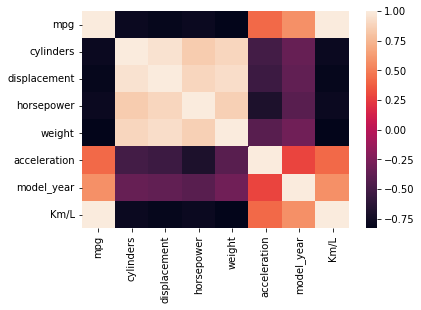

In [ ]:
sns.heatmap(data.corr())

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


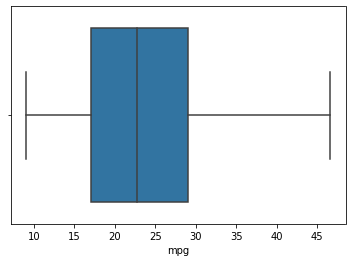

In [ ]:
sns.boxplot(data['mpg']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


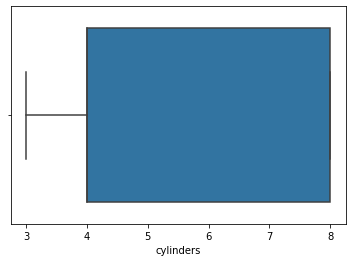

In [ ]:
sns.boxplot(data['cylinders']);

## Crie uma nova coluna com a relação peso/potência para cada veículo e plote um gráfico de dispersão dessa coluna com a de consumo

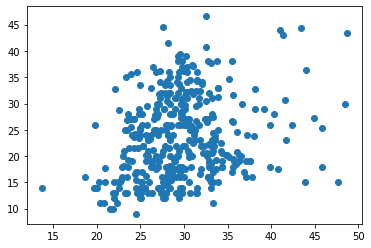

In [ ]:
data['peso/potencia'] = data['weight']/data['horsepower']
plt.scatter( data['peso/potencia'], data['mpg']  )